In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

Loading and Preprocessing

In [3]:
# Loadinbg the dataset
data = pd.read_csv('C:/Users/sjkom/OneDrive/Desktop/ML Final Project/AutoInsurance.csv')

# Displaying the first few rows of the dataframe to inspect the data
print(data.head())


  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4          3/2/2011         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [4]:
print(data.describe())

       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

CHecking for missing Values

In [5]:
# Display summary information about the dataframe to inspect data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# Defining the feature and target variables
mean_claim = data['Total Claim Amount'].mean()
data['High Claim'] = (data['Total Claim Amount'] > mean_claim).astype(int)
X = data.drop(['Total Claim Amount', 'High Claim', 'Customer'], axis=1)  # Assuming 'Customer' is a unique identifier
y = data['High Claim']

Visualizing the distribution of the target variable

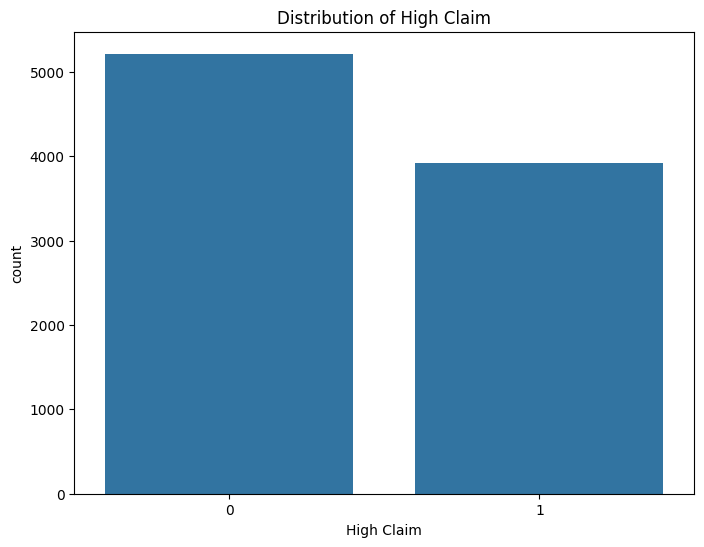

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['High Claim'])
plt.title('Distribution of High Claim')
plt.show()

In [8]:
# Identifing categorical and numeric columns for preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

Distribution of numerical features

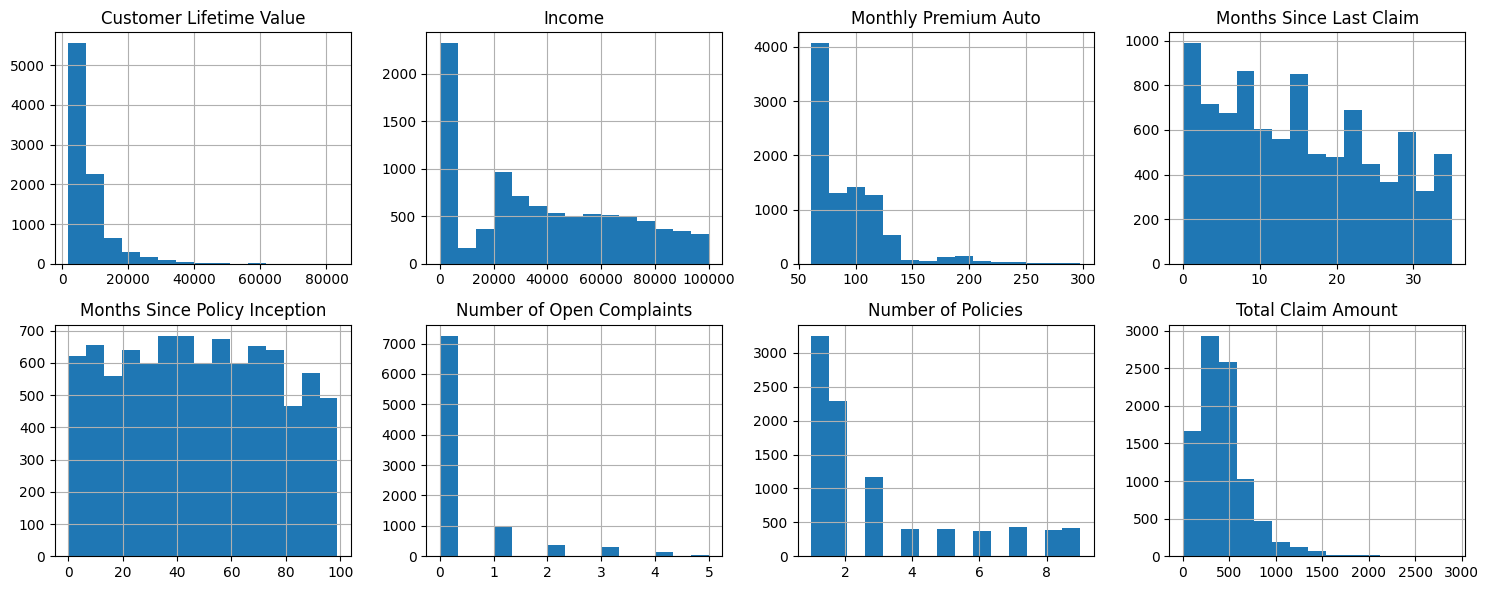

In [9]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

Count plots for categorical variables

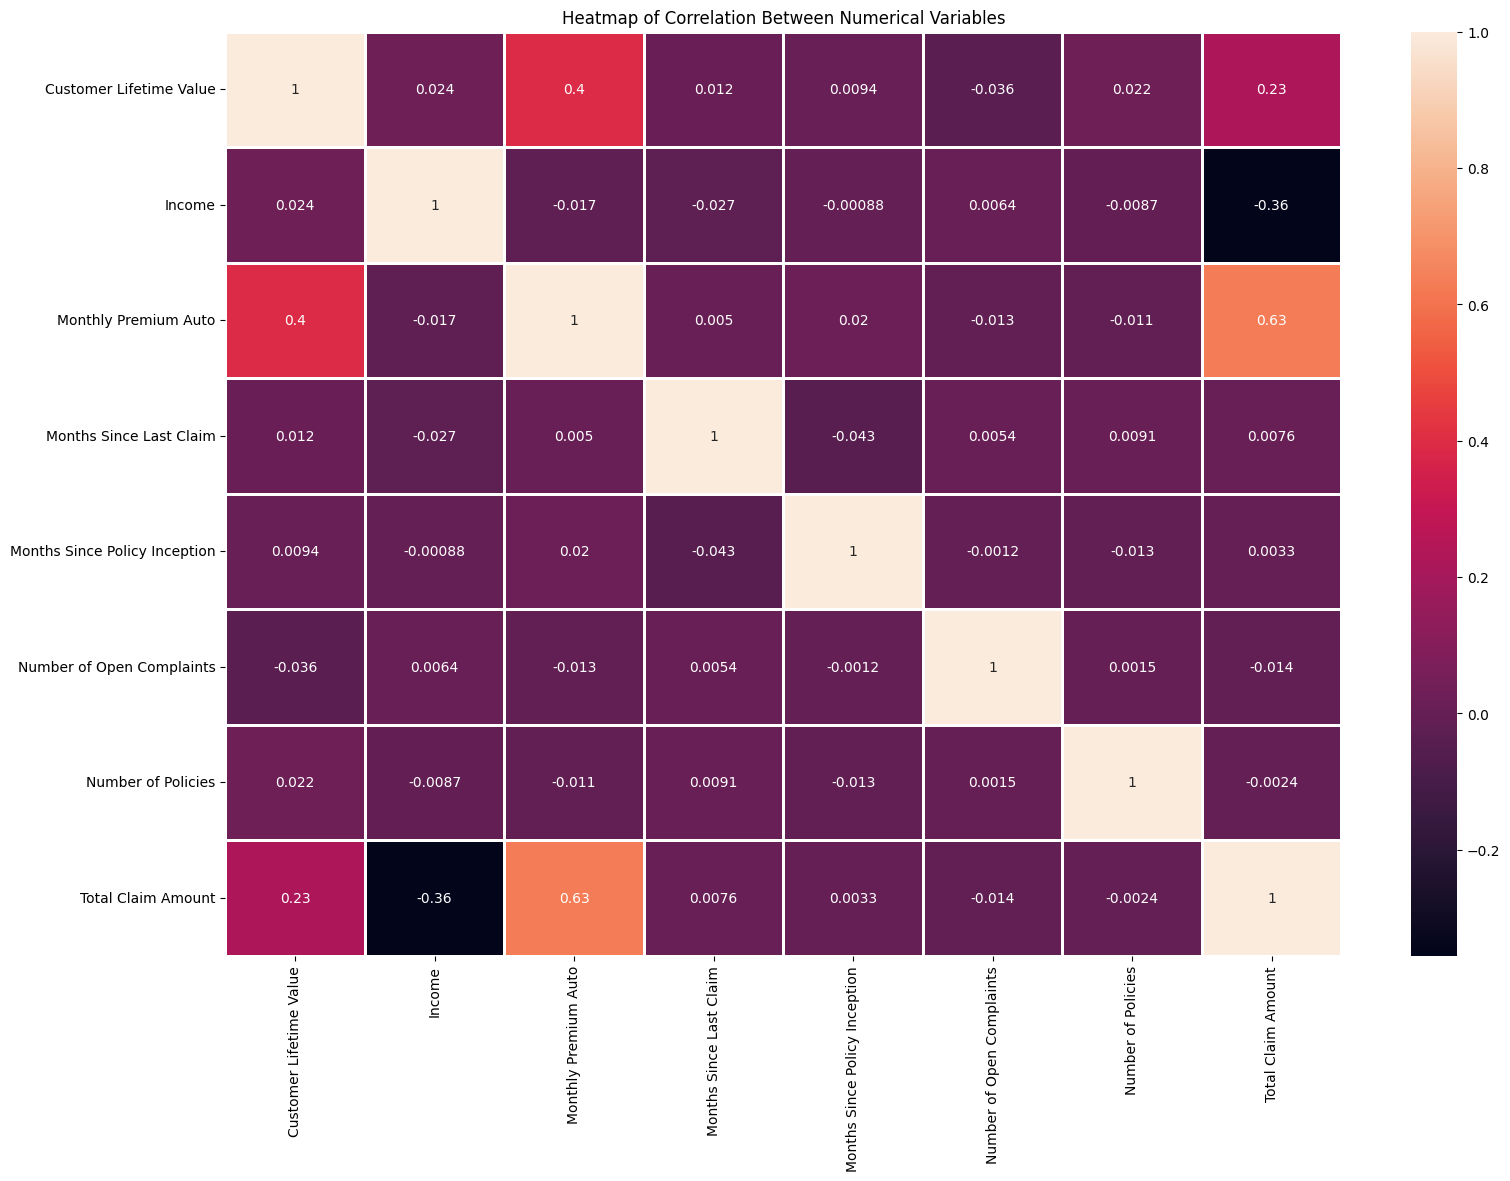

In [10]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1)
plt.title('Heatmap of Correlation Between Numerical Variables')
plt.show()

In [11]:
# Preprocessing for numeric columns
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X[numeric_cols])

In [12]:
# Preprocessing for categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X[categorical_cols])


In [13]:
# Combining numeric and categorical features
X_processed = np.hstack((X_numeric_scaled, X_categorical_encoded.toarray()))

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


Model Building

In [14]:
# Dictionary of models to train
models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'XGBoostClassifier': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}


In [15]:
# Training and evaluating each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit model
    y_pred = model.predict(X_test)  # Predict
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability predictions for ROC-AUC


c:\Users\sjkom\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1068
           1       0.90      0.85      0.88       759

    accuracy                           0.90      1827
   macro avg       0.90      0.89      0.90      1827
weighted avg       0.90      0.90      0.90      1827

RandomForestClassifier Accuracy: 0.8992884510125889
RandomForestClassifier ROC-AUC: 0.9684639506940436


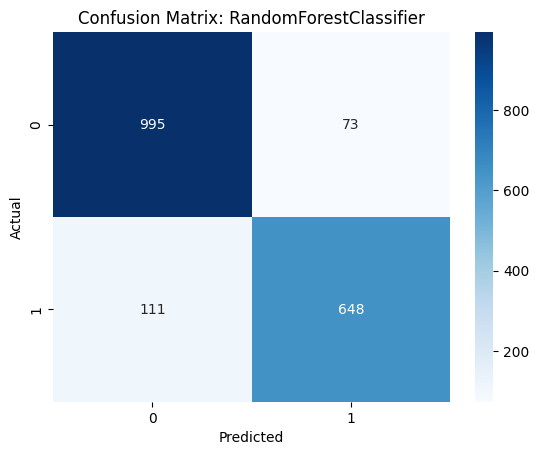

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1068
           1       0.90      0.85      0.87       759

    accuracy                           0.90      1827
   macro avg       0.90      0.89      0.89      1827
weighted avg       0.90      0.90      0.90      1827

GradientBoostingClassifier Accuracy: 0.8987411056376574
GradientBoostingClassifier ROC-AUC: 0.965247245291212


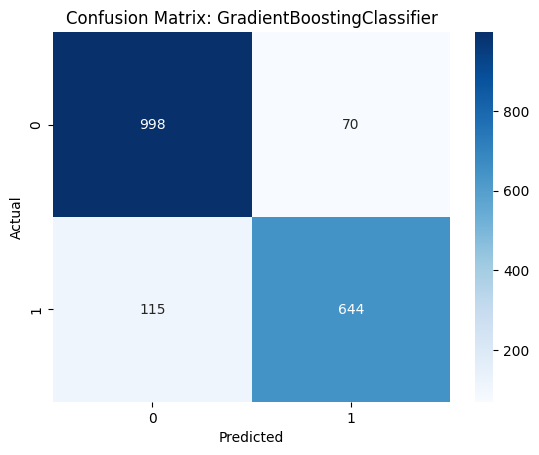

c:\Users\sjkom\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1068
           1       0.88      0.83      0.85       759

    accuracy                           0.88      1827
   macro avg       0.88      0.87      0.88      1827
weighted avg       0.88      0.88      0.88      1827

AdaBoostClassifier Accuracy: 0.8823207443897099
AdaBoostClassifier ROC-AUC: 0.9565871218289391


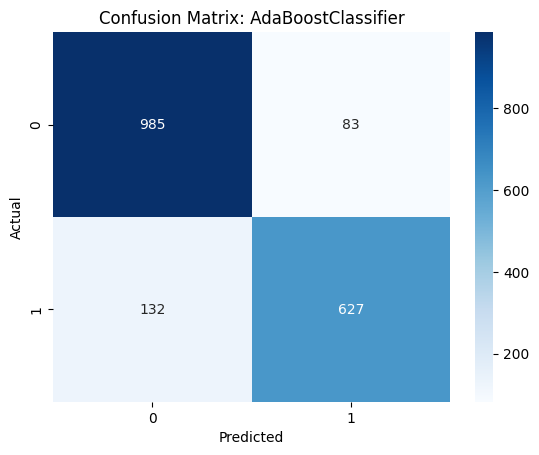

XGBoostClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1068
           1       0.89      0.85      0.87       759

    accuracy                           0.89      1827
   macro avg       0.89      0.89      0.89      1827
weighted avg       0.89      0.89      0.89      1827

XGBoostClassifier Accuracy: 0.8938149972632731
XGBoostClassifier ROC-AUC: 0.9685114456731456


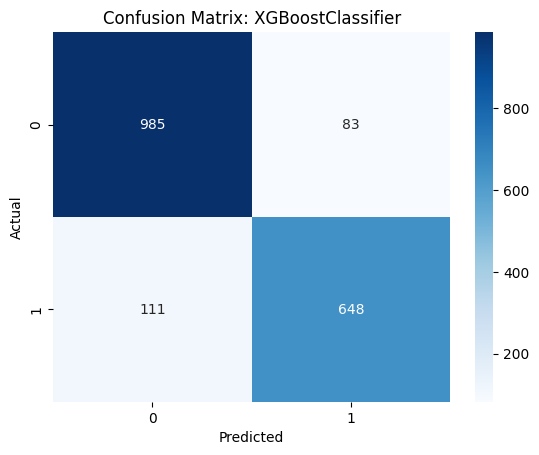

In [16]:
# Training and evaluating each model with exception handling
for model_name, model in models.items():
    try:
        model.fit(X_train, y_train)  # Fit model
        y_pred = model.predict(X_test)  # Predict
        y_proba = model.predict_proba(X_test)[:, 1]  # Probability predictions for ROC-AUC

        # Print classification reports and accuracy
        print(f"{model_name} Classification Report:")
        print(classification_report(y_test, y_pred))
        print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")
        print(f"{model_name} ROC-AUC: {roc_auc_score(y_test, y_proba)}")

        # Display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix: {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    except Exception as e:
        print(f"Error with {model_name}: {str(e)}")


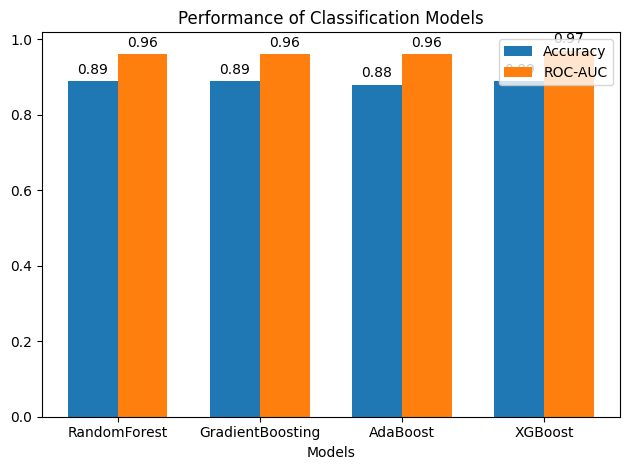

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace these with your actual data)
model_names = ['RandomForest', 'GradientBoosting', 'AdaBoost', 'XGBoost']
accuracies = [0.89, 0.89, 0.88, 0.89]  # Example accuracy scores
roc_auc_scores = [0.96, 0.96, 0.96, 0.97]  # Example ROC-AUC scores

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, roc_auc_scores, width, label='ROC-AUC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Performance of Classification Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
